## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [ ]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [ ]:
train, test = keras.datasets.cifar10.load_data()

In [ ]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [ ]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [ ]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    return model

In [ ]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [ ]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = []
redice_lr_patient = []

In [ ]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = 
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

Epoch 44/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.7406 - acc: 0.7678 - val_loss: 1.4848 - val_acc: 0.4970

Epoch 00044: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 45/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.7361 - acc: 0.7691 - val_loss: 1.4853 - val_acc: 0.4996
Epoch 46/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.7337 - acc: 0.7720 - val_loss: 1.4860 - val_acc: 0.4981
Epoch 47/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.7322 - acc: 0.7707 - val_loss: 1.4859 - val_acc: 0.4993
Epoch 48/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.7293 - acc: 0.7727 - val_loss: 1.4869 - val_acc: 0.4982
Epoch 49/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.7290 - acc: 0.7722 - val_loss: 1.4875 - val_acc: 0.4995

Epoch 00049: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 50/50

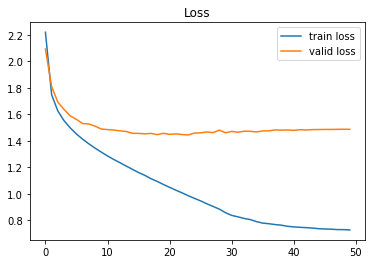

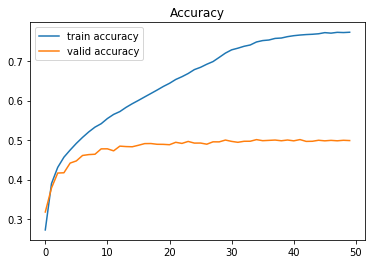

In [1]:
import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
train, test = keras.datasets.cifar10.load_data()
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
"""
# 載入 Callbacks, 並設定監控目標為 validation loss
"""
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 3s 68us/step - loss: 0.2667 - acc: 0.9392 - val_loss: 1.7434 - val_acc: 0.5339
Epoch 47/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.2667 - acc: 0.9387 - val_loss: 1.7464 - val_acc: 0.5324
Epoch 48/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.2643 - acc: 0.9397 - val_loss: 1.7494 - val_acc: 0.5336
Epoch 49/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.2633 - acc: 0.9399 - val_loss: 1.7536 - val_acc: 0.5343
Epoch 50/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.2617 - acc: 0.9405 - val_loss: 1.7558 - val_acc: 0.5317

Epoch 00050: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
___________________________________________

Epoch 41/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.2840 - acc: 0.9397 - val_loss: 1.6712 - val_acc: 0.5236
Epoch 42/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.2824 - acc: 0.9410 - val_loss: 1.6718 - val_acc: 0.5212

Epoch 00042: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
Epoch 43/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.2790 - acc: 0.9424 - val_loss: 1.6707 - val_acc: 0.5229
Epoch 44/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.2772 - acc: 0.9436 - val_loss: 1.6733 - val_acc: 0.5213
Epoch 45/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.2767 - acc: 0.9436 - val_loss: 1.6761 - val_acc: 0.5214
Epoch 46/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.2756 - acc: 0.9443 - val_loss: 1.6777 - val_acc: 0.5208
Epoch 47/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.2750 - ac

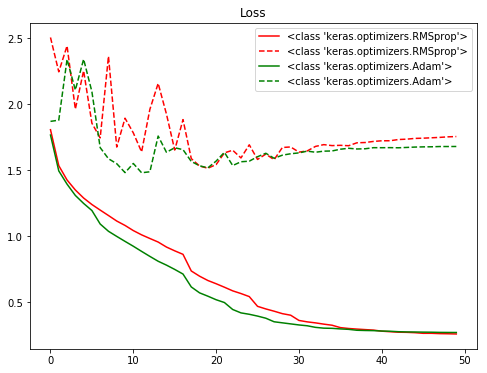

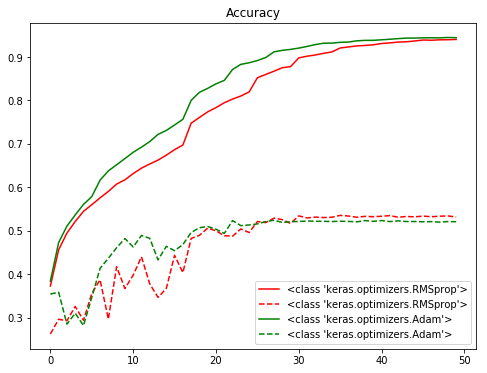

In [4]:
#請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果
import keras
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import ReduceLROnPlateau
train, test = keras.datasets.cifar10.load_data()
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
OPTIMIZER = [keras.optimizers.RMSprop, keras.optimizers.Adam]
results = {}
"""
# 載入 Callbacks, 並設定監控目標為 validation loss
"""
for i,opti in enumerate(OPTIMIZER):
    reduce_lr = ReduceLROnPlateau(factor=0.5, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=5, 
                                  verbose=1)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opti(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "%s" % (str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_21 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 3s 67us/step - loss: 0.7846 - acc: 0.7497 - val_loss: 1.4821 - val_acc: 0.4995
Epoch 48/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7845 - acc: 0.7518 - val_loss: 1.4823 - val_acc: 0.4990
Epoch 49/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7837 - acc: 0.7507 - val_loss: 1.4824 - val_acc: 0.5002

Epoch 00049: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
Epoch 50/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7837 - acc: 0.7519 - val_loss: 1.4825 - val_acc: 0.5000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________

50000/50000 [==============================] - 3s 67us/step - loss: 0.7463 - acc: 0.7659 - val_loss: 1.4879 - val_acc: 0.5035
Epoch 45/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7437 - acc: 0.7675 - val_loss: 1.4868 - val_acc: 0.5078
Epoch 46/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.7424 - acc: 0.7682 - val_loss: 1.4884 - val_acc: 0.5043
Epoch 47/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.7389 - acc: 0.7703 - val_loss: 1.4907 - val_acc: 0.5038
Epoch 48/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7383 - acc: 0.7703 - val_loss: 1.4917 - val_acc: 0.5039
Epoch 49/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7365 - acc: 0.7707 - val_loss: 1.4933 - val_acc: 0.5045

Epoch 00049: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
Epoch 50/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.7316 - acc: 0.7715 - 

50000/50000 [==============================] - 3s 67us/step - loss: 0.7587 - acc: 0.7606 - val_loss: 1.4911 - val_acc: 0.5014

Epoch 00040: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
Epoch 41/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7474 - acc: 0.7668 - val_loss: 1.4923 - val_acc: 0.5006
Epoch 42/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7411 - acc: 0.7689 - val_loss: 1.4922 - val_acc: 0.5049
Epoch 43/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7350 - acc: 0.7706 - val_loss: 1.4923 - val_acc: 0.5034
Epoch 44/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7292 - acc: 0.7726 - val_loss: 1.4972 - val_acc: 0.5010
Epoch 45/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7246 - acc: 0.7756 - val_loss: 1.5009 - val_acc: 0.5022

Epoch 00045: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
Epoch 46/50
50000/50

50000/50000 [==============================] - 3s 67us/step - loss: 0.7585 - acc: 0.7579 - val_loss: 1.5086 - val_acc: 0.4982
Epoch 37/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7448 - acc: 0.7628 - val_loss: 1.5191 - val_acc: 0.4959
Epoch 38/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7314 - acc: 0.7681 - val_loss: 1.5282 - val_acc: 0.5013
Epoch 39/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.7184 - acc: 0.7736 - val_loss: 1.5427 - val_acc: 0.4935

Epoch 00039: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
Epoch 40/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.6993 - acc: 0.7810 - val_loss: 1.5301 - val_acc: 0.4966
Epoch 41/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.6855 - acc: 0.7884 - val_loss: 1.5393 - val_acc: 0.5023
Epoch 42/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.6744 - acc: 0.7913 - 

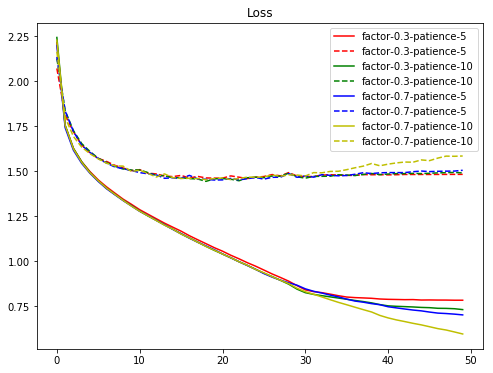

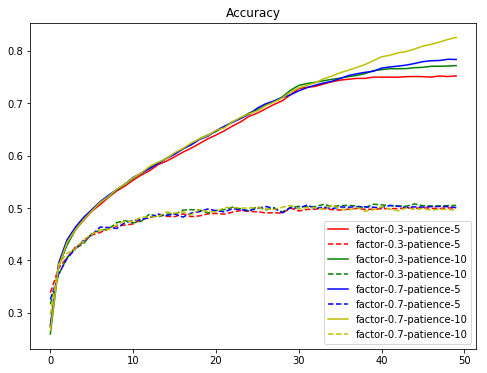

In [6]:
#請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
import keras
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
train, test = keras.datasets.cifar10.load_data()
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
FACTOR = [0.3,0.7]
PATIENCE = [5,10]
"""
# 載入 Callbacks, 並設定監控目標為 validation loss
"""
results = {}
for fa, pat in itertools.product(FACTOR, PATIENCE):
    reduce_lr = ReduceLROnPlateau(factor=fa, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=pat, 
                                  verbose=1)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "factor-%s-patience-%s" % (str(fa), str(pat))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()